# Crear documentos PDF

## Usaremos FPDF, que es uno de los paquetes más versátiles e intuitivos que se utilizan para generar PDF en Python.

### Lo primero es instalar la librería

In [1]:
pip install FPDF

Note: you may need to restart the kernel to use updated packages.


### Luego, debemos importar las bibliotecas que usaremos para renderizar nuestro documento:

In [1]:
import numpy as np

from fpdf import FPDF

### Posteriormente procedemos con la creación de la primera página del documento PDF, configurando la fuente con su tamaño y color:

In [2]:
pdf = FPDF(orientation='P', unit='mm', format ='A4') # Configuramos las características principales del documento.
pdf.add_page() # Agregamos la primera página donde coloczr el contenido deseado.
pdf.set_font('Arial','',10) # Definimos el tipo de letra.
# Ahora generamos un contenido de texto estático:
pdf.write(5,'Esta es la primera línea de nuestro documento')
pdf.ln(h='') # Se genera un salto de línea, según parámetro.
pdf.write(5, 'No es muy interesante generar contenido estático, pero esta es la forma de hacerlo.')
# Ahora escribiremos varias líneas más abajo, aumentando el tamaño de la letra y su color:
pdf.ln(h=20)
pdf.set_font('Arial','',45)
pdf.set_text_color(0, 0, 192)
pdf.write(10, 'Este texto es de letra más grande y de color modificado')
# Volvemos modificar el solor, pero esta vez el texto está en negrilla 
pdf.set_text_color(192, 0, 0)
pdf.set_font('Arial','B',22)
pdf.ln(h=20)
pdf.write(10, 'Este texto ahora está en negrilla y de tamaño intermedio')
pdf.line(5, 80, 210, 80) # Dibujamos una línea antre dos puntos
pdf.dashed_line(5, 90, 210, 90, 1,1) # Puede ser segmentada
pdf.set_font('Arial','U',45) # También podemos subrayar el texto
pdf.ln(h=15)
pdf.write(10, 'Este es un texto subrayado')
pdf.set_font('Arial','I',45)
pdf.ln(h=40)
pdf.write(10, 'Texto itálico')
# Finalmente grabamos nuestro documento
pdf.output('miPrimerPDFconPython.pdf', 'F')
pdf.close()

### Insertar una imagen de fondo y complementarla con texto

In [3]:
pdf = FPDF(orientation='P', unit='mm', format ='A4')
pdf.add_page()
pdf.image('C:\\Users\\ulise\\Python\\Cómo generar PDF\\page.png', x = 0, y = 0, w = 210, h = 297)
# Agregamos texto sobre la imagen
pdf.set_font('Arial','',10) # Definimos el tipo de letra.
pdf.write(10,'Esta es la primera línea de nuestro documento') # Poca versatilidad sino solo elegir la fila 
pdf.text(100, 50, 'Esta es la segunda línea de nuestro documento')  # Mayor control sobre el texto a escribir
pdf.set_xy(100, 100) # Este es el método más adecuado para alinear o centrar texto variable o dinámico.
pdf.cell(50, 10, 'Este es un texto particular, colocado dentro de una celda', 1, 1, 'C') # Por medio de alinear una celda con el respectivo texto.
pdf.output('miSegundoPDFconPython.pdf', 'F')
pdf.close()

### Insertar un gráfico a partir de data variable

#### Primero creamos algunos gráficos a partir de pandas, una de las librerías más estándar que se utiliza para el análisis de datos en Python, para luego insertarlas en nuestro documento PDF.

In [4]:
import pandas as pd

In [5]:
marvel_data = [
    ['Spider-Man', 'male', 1962],
    ['Captain America', 'male', 1941],
    ['Wolverine', 'male', 1974],
    ['Iron Man', 'male', 1963],
    ['Thor', 'male', 1963],
    ['Thing', 'male', 1961],
    ['Mister Fantastic', 'male', 1961],
    ['Hulk', 'male', 1962],
    ['Beast', 'male', 1963],
    ['Invisible Woman', 'female', 1961],
    ['Storm', 'female', 1975],
    ['Namor', 'male', 1939],
    ['Hawkeye', 'male', 1964],
    ['Daredevil', 'male', 1964],
    ['Doctor Strange', 'male', 1963],
    ['Hank Pym', 'male', 1962],
    ['Scarlet Witch', 'female', 1964],
    ['Wasp', 'female', 1963],
    ['Black Widow', 'female', 1964],
    ['Vision', 'male', 1968]
]

marvel_df = pd.DataFrame(data=marvel_data)

In [6]:
marvel_df

,0,1,2
0,Spider-Man,male,1962
1,Captain America,male,1941
2,Wolverine,male,1974
3,Iron Man,male,1963
4,Thor,male,1963
5,Thing,male,1961
6,Mister Fantastic,male,1961
7,Hulk,male,1962
8,Beast,male,1963
9,Invisible Woman,female,1961


<AxesSubplot:>

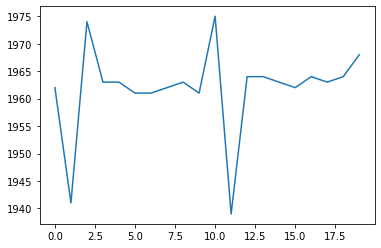

In [7]:
marvel_df.columns = ['Nombre','Género','Año']
marvel_df.Año.plot()

#### Primero grabaremos directamente la imagen antes generada directamente desde pandas utilizando la librería "dataframe-image"

In [14]:
pip install dataframe-image

In [8]:
import pandas as pd
import dataframe_image as dfi
 
dfi.export(marvel_df,'imagen_del_dataframe.png')

AttributeError: 'AxesSubplot' object has no attribute 'shape'

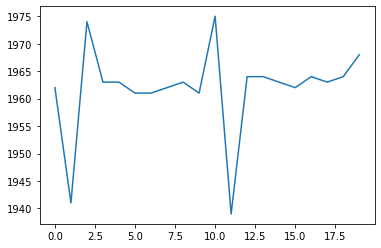

In [9]:
dfi.export(marvel_df.Año.plot(),'gráfico_del_dataframe')

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter 

(array([ 2.,  0.,  0.,  0.,  0.,  0., 15.,  0.,  1.,  2.]),
 array([1939. , 1942.6, 1946.2, 1949.8, 1953.4, 1957. , 1960.6, 1964.2,
        1967.8, 1971.4, 1975. ]),
 <BarContainer object of 10 artists>)

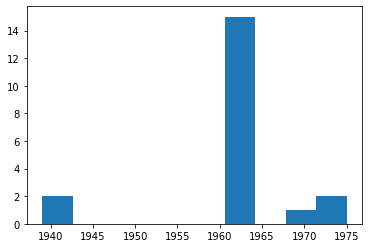

In [9]:
plt.hist(marvel_df.Año)